# Reinforcement Learning - Minimal Q-learning bot

### Some terms:
- Agent: An entity containing possible actions and policy functions, acts in the environment (example: A robot vacuum)
- Environment: the bounded (or unbounded) are where the agent operates (example: An apartment)
- State : Interpreted information about the environment (example: An image of the apartment in the direction the robot vacuum is facing)
- Reward : Imediate value of performing some action (example: Action: You work overtime to fix a bug, reward: Pat on the back and a "Good job!")
- Policy : A mapping between a state and an action (example: floor: dirty -> action: clean)
- Episode: A bounded number of time steps in the environment

<img src="img/2560px-Reinforcement_learning_diagram.png" alt="drawing" width="500"/>

## GridWorld:

<img src="img/gridworld.png" alt="drawing" width="500"/>

In [15]:
from qlearning import QLearner
from grid_world import GridWorld, Default
import pandas as pd
import numpy as nd

In [16]:
def newBoard(): 
    board = [   
        0,0,0,0,0,
        0,1,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0]

    rewards = dict()
    rewards[24] = nd.array([100, 100])
    rewards[4] = nd.array([-10, -50])
    rewards[19] = nd.array([-20, -70])

    grid_world = Default(board, rewards, 6, 24, 5, 5)
    return grid_world

In [17]:
def qlearner(learning_rate=0.1, discount_factor=0.9, explore_rate = 0.01):
    learner = QLearner(['up', 'down', 'right', 'left'], learning_rate, discount_factor, explore_rate, objectives=2)
    episodes = list()
    for episode in range(1, 1000):
        totalValue = 0
        actions = list()
        world = newBoard()
        learner.start_episode(world.actor_pos)

        end = False
        while end != True:
            action = learner.act(world.actor_pos)
            actions.append(action)
            value, end = world.act(action)
            totalValue += value[0]
            learner.reward(value, world.actor_pos)

        learner.end_episode()
        episodes.append((episode, totalValue, actions))
    return learner, episodes

In [18]:
def episodes_to_df(episodes, columns=['episode', 'total value', 'actions']) -> pd.DataFrame:
    return pd.DataFrame(episodes, columns=columns)

def print_actions(episodes):
    for episode, totalValue, actions in episodes:
        print("Episode: {}, total value: {}, actions: {}".format(episode, totalValue, actions))

In [19]:
q1, q1_episodes = qlearner()
q1_df = episodes_to_df(q1_episodes)

q2, q2_episodes = qlearner(learning_rate=0.2, explore_rate=0.1)
q2_df = episodes_to_df(q2_episodes)

q3, q3_episodes = qlearner(learning_rate=0.5)
q3_df = episodes_to_df(q3_episodes)

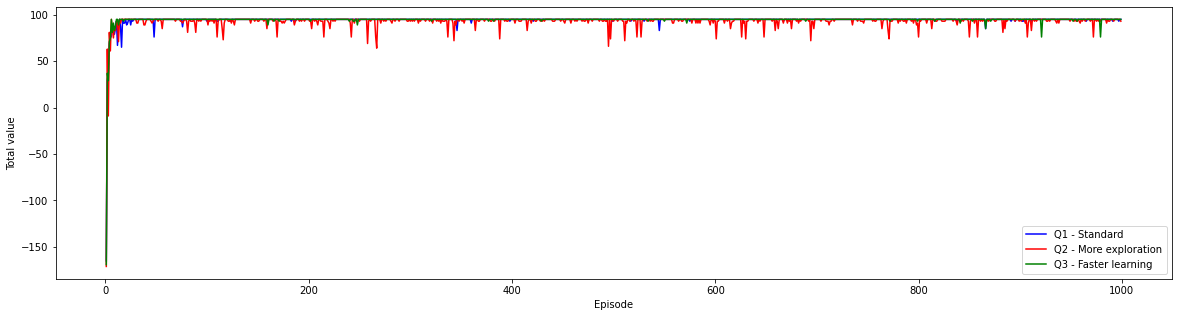

In [20]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,5))
pyplot.plot(range(1, 1000), q1_df['total value'], 'b-')
pyplot.plot(range(1, 1000), q2_df['total value'], 'r-')
pyplot.plot(range(1, 1000), q3_df['total value'], 'g-')
pyplot.ylabel("Total value")
pyplot.xlabel("Episode")
pyplot.legend(['Q1 - Standard','Q2 - More exploration', 'Q3 - Faster learning'])
pyplot.show()

In [21]:
import collections
od = collections.OrderedDict(sorted(q1.Q.items()))
actions = [value for _, value in od.items()]
q_value_df = pd.DataFrame(actions, columns=['Up', 'Down', 'Right', 'Left'])
q_value_df

,Up,Down,Right,Left
0,"[-1.0, -1.0]","[-1.0415711179268266, 0.0001343052222589049]","[-1.082565997506116, 0.00010658628620323703]","[-1.0, -1.0]"
1,"[-1.9900000000000002, -1.8998885336618803]","[16.00693961152795, 18.27693051683675]","[-1.0535629218992315, 0.001238514867996077]","[-1.0504683144265186, 7.201323289219725e-06]"
2,"[-1.0, -1.0]","[-0.7921217149100706, 0.08925667410830522]","[-0.8337276446890524, 0.00021316689000000006]","[-0.825374272583389, 9.54067333528672e-05]"
3,"[-1.0, -1.0]","[-0.6542485039000001, 0.0012465900000000003]","[-1.0, -5.0]","[-0.7114176812679066, 0.0006502891722189878]"
4,"[-1.0, -1.0]","[-0.1, 0.0]","[-1.0, -1.0]","[-0.1, 0.0]"
5,"[-1.0586404671370506, 1.8568660963599193e-05]","[-0.5786245989998213, 0.5340726438774254]","[-1.0524595447215375, 0.01030683701913939]","[-1.9900000000000002, -1.8990723846682775]"
6,"[0.8981195378840632, 2.501852936688139]","[54.95389999999976, 59.04899999999972]","[2.1299607188450462, 3.6395932688093797]","[-1.2649642613068548, 0.0011238649153259078]"
7,"[-0.68002727559346, 5.314410000000002e-06]","[28.838294381451924, 30.972740590146692]","[-0.6925252606509933, 0.05265518600188261]","[-0.7691180220734364, 0.00037974558441903315]"
8,"[-0.49010009149, 0.0]","[13.915989861787597, 15.02284161663088]","[-0.490099501, 0.0]","[-0.5223833816733461, 0.0011166367847580002]"
9,"[-1.0, -5.0]","[-0.48143242, 0.0]","[-1.0, -1.0]","[-0.394833781, 0.0]"
